<a href="https://colab.research.google.com/github/Pallab-Paul/Stock-Prediction/blob/master/Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

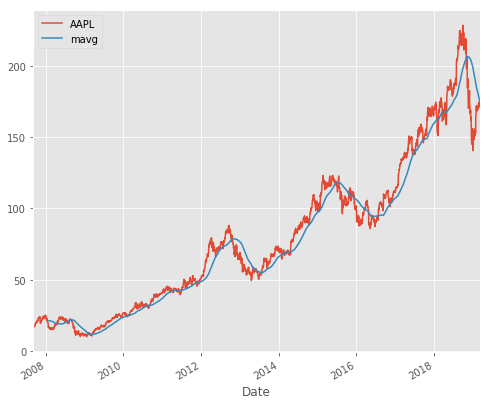

In [62]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

start = datetime.datetime(2007,9,4)
end = datetime.datetime(2019,3,9)

df = web.DataReader("AAPL",'yahoo',start,end)
df.	tail()
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

# Adjusting the size of matplotlib

mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()



0.9682836976236266


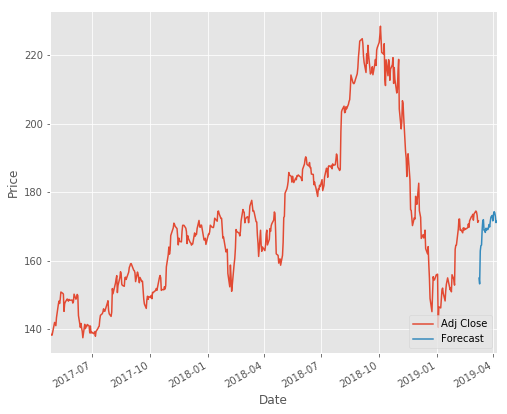

In [63]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


import math
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))


# Scale the X so that everyone can have the same distribution for linear regression
X = scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

confidencereg = clfreg.score(X_test, y_test)
print(confidencereg)

forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan


last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

0.9645031699756399


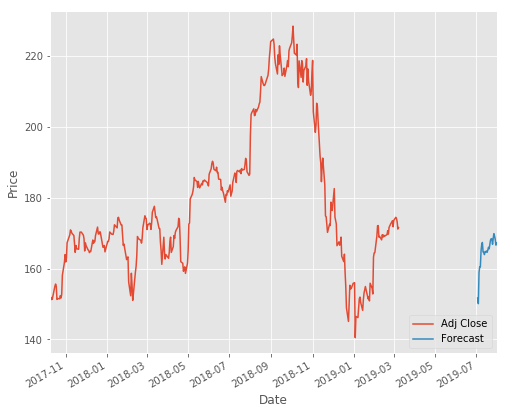

In [67]:
from sklearn.linear_model import Ridge
#clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge(alpha=100))
clfpoly3 = Ridge(alpha=100)
clfpoly3.fit(X_train, y_train)


confidencereg = clfpoly3.score(X_test, y_test)
print(confidencereg)

forecast_set = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan


last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

0.9765414471092639


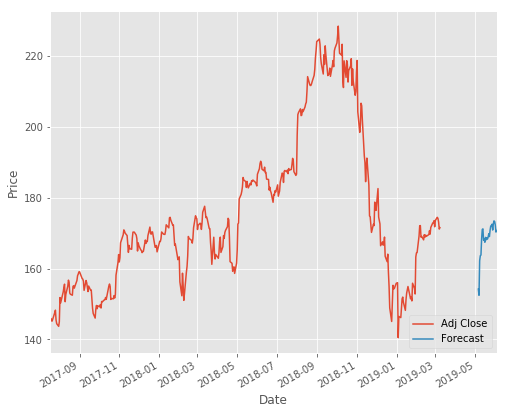

In [59]:
from sklearn.linear_model import Lasso
clfpoly4 = Lasso()
clfpoly4.fit(X_train, y_train)


confidencereg = clfpoly4.score(X_test, y_test)
print(confidencereg)

forecast_set = clfpoly4.predict(X_lately)
dfreg['Forecast'] = np.nan


last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Prediction confidence of the model using Lasso is the highest compare to linear regression and Ridge regression